In [1]:
import os, sys
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tabulate import tabulate

%matplotlib inline

In [2]:
# pd.options.display.float_format = lambda x : '{:.2f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)

In [3]:
camrest_model_name_map = {
    'CAMREST_KA_0': 'GPT2',
    'CAMREST_KA_50': 'GPT2+KA',
    'CAMREST_KA_KBret': 'KBret',
    'CAMREST_KB': 'GPT2+KB',
    'human': 'Human'
}

smd_model_name_map = {
    'SMD_KA_0': 'GPT2',
    'SMD_KA_100': 'GPT2+KA',
    'SMD_KA_DFF': 'DFF',
    'SMD_KB': 'GPT2+KB',
    'human': 'Human'
}

mwoz_model_name_map = {
    'MWOZ_KA_0': 'GPT2',
    'MWOZ_KA_100': 'GPT2+KA',
    'MWOZ_KA_DFF': 'DFF',
    'MWOZ_KA_DAMD': 'DAMD',
    'human': 'Human'
}

dataset_name_to_model_name_map = {
    'CamRest': camrest_model_name_map,
    'SMD': smd_model_name_map,
    'MWoZ': mwoz_model_name_map
}

In [4]:
additional_mwoz_df = pd.read_csv('MWOZ_eval_1_labelled.csv').dropna()
additional_mwoz_df['dataset'] = 'MWoZ'

additional_mwoz_model_df = pd.read_csv('MWOZ_GOLD_eval_1.csv')
additional_mwoz_model_df = additional_mwoz_model_df[['index', 'model']]
additional_mwoz_df = additional_mwoz_df.merge(additional_mwoz_model_df, on='index', how='left')

humanness_add_mwoz_df = additional_mwoz_df.groupby(['index','model']).agg({'humanness':'mean'}).reset_index()

In [5]:
additional_smd_df = pd.read_csv('SMD_eval_1_labelled.csv').dropna()
additional_smd_df = additional_smd_df.rename({'Humanness':'humanness'}, axis='columns')
additional_smd_df['dataset'] = 'SMD'

additional_smd_model_df = pd.read_csv('SMD_GOLD_eval_1.csv')
additional_smd_model_df = additional_smd_model_df[['index', 'model']]
additional_smd_df = additional_smd_df.merge(additional_smd_model_df, on='index', how='left')

humanness_add_smd_df = additional_smd_df.groupby(['index','model']).agg({'humanness':'mean'}).reset_index()

# Humanness

In [6]:
def index_to_dataset_name(idx):
    if idx % 10 == 7:
        return 'MWoZ'
    elif idx % 10 == 5:
        return 'SMD'
    elif idx % 10 == 3:
        return 'CamRest'
    else:
        return 'DialKG'        

In [7]:
def model_name_to_code(name):
    if name == 'GPT2':
        return 'A1'
    elif name == 'GPT2+KA':
        return 'A2'
    elif name == 'Human':
        return 'A9'
    elif name == 'GPT2+KB':
        return 'B0'
    else:
        return 'B9'

In [8]:
model_df = pd.read_csv('GOLD_eval.csv')[['index','model']]
figure7_model_df = pd.read_csv('Figure8_GOLD_eval_1.csv')[['index','model']]
model_df = pd.concat([model_df, figure7_model_df])

In [9]:
dfs = []
for fname in glob.glob("humanness_*.csv"):
    df = pd.read_csv(fname)
    dfs.append(df)
df = pd.concat(dfs)
df = df[['index','history','context','humanness']]

In [10]:
df.head()

,index,history,context,humanness
0,915,USR: what is the weather like in the city\r\nS...,what is the weather in compton on sunday ?,4
1,347,USR: i am looking for a place to stay . the ho...,i am looking for a place to stay . the hotel s...,4
2,763,USR: i am looking for a restaurant that is mod...,great ! can i have the phone number and postco...,4
3,835,USR: what time is my next dinner event and who...,what time is my next dinner event and who will...,4
4,803,"USR: hi , i 'd like to find an expensive canto...","hi , i 'd like to find an expensive cantonese ...",4


In [11]:
gdf = df.groupby(['index']).agg({'humanness':'mean'}).reset_index()
gdf = gdf.merge(model_df, on='index', how='left')

In [12]:
gdf = pd.concat([gdf, humanness_add_mwoz_df, humanness_add_smd_df])
gdf['dataset'] = gdf['index'].apply(index_to_dataset_name)
gdf.groupby('dataset').size()

dataset
CamRest    150
MWoZ       495
SMD        450
dtype: int64

           count      mean      std  min   25%       50%  75%  max
humanness  150.0  3.211111  0.88438  1.0  2.75  3.666667  4.0  4.0
model                 GPT2    GPT2+KA    GPT2+KB      Human      KBret
humanness count  30.000000  30.000000  30.000000  30.000000  30.000000
          mean    3.422222   3.477778   2.422222   3.600000   3.133333
          std     0.866283   0.610780   1.031806   0.466502   0.828607
          min     1.000000   1.666667   1.000000   2.333333   1.000000
          25%     3.083333   3.000000   1.666667   3.333333   2.750000
          50%     4.000000   3.666667   2.333333   3.666667   3.166667
          75%     4.000000   4.000000   3.333333   4.000000   3.666667
          max     4.000000   4.000000   4.000000   4.000000   4.000000


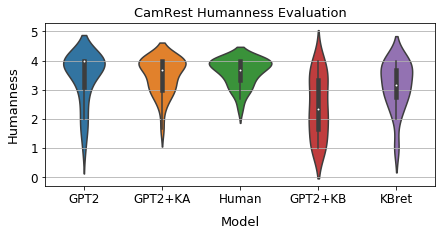

           count      mean       std  min  25%       50%  75%  max
humanness  450.0  3.442569  0.735378  1.0  3.0  3.666667  4.0  4.0
model                  DFF       GPT2    GPT2+KA    GPT2+KB      Human
humanness count  90.000000  90.000000  90.000000  90.000000  90.000000
          mean    3.275544   3.485193   3.440853   3.468781   3.542474
          std     0.828877   0.816682   0.711071   0.693150   0.589311
          min     1.000000   1.000000   1.000000   1.000000   1.000000
          25%     3.000000   3.333333   3.000000   3.000000   3.055556
          50%     3.411411   4.000000   3.666667   3.760606   3.805556
          75%     4.000000   4.000000   4.000000   4.000000   4.000000
          max     4.000000   4.000000   4.000000   4.000000   4.000000


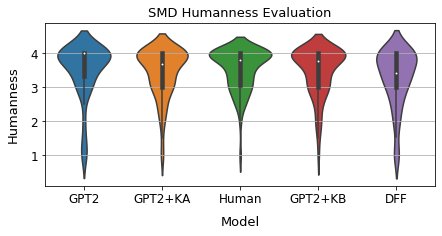

           count      mean       std  min  25%       50%  75%  max
humanness  495.0  3.337424  0.848474  1.0  3.0  3.666667  4.0  4.0
model                  DAMD        DFF       GPT2    GPT2+KA      Human
humanness count  100.000000  98.000000  97.000000  99.000000  98.000000
          mean     3.313609   2.648358   3.511613   3.556233   3.657337
          std      0.817602   1.046757   0.709030   0.631160   0.550645
          min      1.000000   1.000000   1.000000   1.000000   1.000000
          25%      3.000000   2.000000   3.000000   3.000000   3.500000
          50%      3.666667   2.666667   4.000000   3.876543   4.000000
          75%      4.000000   3.664474   4.000000   4.000000   4.000000
          max      4.000000   4.000000   4.000000   4.000000   4.000000


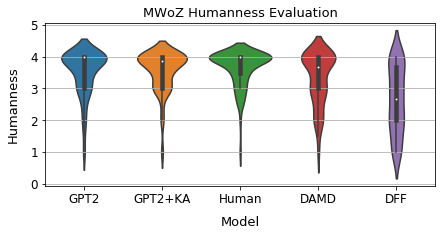

In [13]:
plt.rcParams["figure.figsize"] = (7,3)
for i, dataset in enumerate(gdf['dataset'].unique()):
    model_name_map = dataset_name_to_model_name_map[dataset]
    ddf = gdf.loc[gdf['dataset'] == dataset,['model','humanness']].copy()
    ddf['model'] = ddf['model'].apply(lambda x: model_name_map[x])
    ddf['model_code'] = ddf['model'].apply(model_name_to_code)
    ddf = ddf.sort_values('model_code')
    
    print(ddf.describe().T)
    print(ddf.groupby('model').describe().T)
    
    ax = sns.violinplot('model','humanness', data=ddf)
    ax.set_title(f'{dataset} Humanness Evaluation', fontsize=13)
    ax.tick_params(axis='both', rotation=0, labelsize=12)    
    
    ax.yaxis.grid(True)
    ax.set_xlabel('Model', fontsize=13, labelpad=10)
    ax.set_ylabel('Humanness', fontsize=13, labelpad=10)

    plt.savefig(f'humanness_{dataset}.png', bbox_inches='tight')
    plt.savefig(f'humanness_{dataset}.pdf', bbox_inches='tight')
    plt.show()

In [14]:
data_list = []
datasets = gdf.dataset.unique().tolist()
for dataset in datasets:
    ddf = gdf.loc[gdf['dataset'] == dataset, :]
    models = ddf['model'].unique().tolist()
    for i in range(len(models)):
        for j in range(i+1, len(models)):
            model_i = models[i]
            model_j = models[j]
            score_i = ddf.loc[ddf['model'] == model_i, 'humanness'].values
            score_j = ddf.loc[ddf['model'] == model_j, 'humanness'].values
            score_i = np.repeat(score_i,5)
            score_j = np.repeat(score_j,5)            
            t, p = stats.ttest_ind(score_i,score_j)
            data_list.append({
                'dataset':dataset, 'model_1':model_i, 'model_2':model_j, 
                'score_1':score_i.mean(),'score_2':score_j.mean(), 'p':p, 'significance': p <= 0.05
            })
sdf = pd.DataFrame(data_list)

In [15]:
sdf[(sdf['model_1'] == 'human') | (sdf['model_2'] == 'human')]

,dataset,model_1,model_2,score_1,score_2,p,significance
2,CamRest,CAMREST_KA_50,human,3.477778,3.600000,4.926206e-02,True
5,CamRest,CAMREST_KB,human,2.422222,3.600000,1.340019e-30,True
7,CamRest,CAMREST_KA_KBret,human,3.133333,3.600000,3.419491e-09,True
9,CamRest,human,CAMREST_KA_0,3.600000,3.422222,2.561502e-02,True
12,SMD,SMD_KA_DFF,human,3.275544,3.542474,2.967721e-08,True
15,SMD,SMD_KB,human,3.468781,3.542474,8.470258e-02,False
17,SMD,SMD_KA_0,human,3.485193,3.542474,2.258507e-01,False
19,SMD,human,SMD_KA_100,3.542474,3.440853,1.926114e-02,True
22,MWoZ,MWOZ_KA_100,human,3.556233,3.657337,7.292499e-03,True
25,MWoZ,MWOZ_KA_DAMD,human,3.313609,3.657337,1.897856e-14,True


In [16]:
sdf[(sdf['model_1'].str.contains('KA_100')) | (sdf['model_2'].str.contains('KA_100'))]

,dataset,model_1,model_2,score_1,score_2,p,significance
13,SMD,SMD_KA_DFF,SMD_KA_100,3.275544,3.440853,1.303238e-03,True
16,SMD,SMD_KB,SMD_KA_100,3.468781,3.440853,5.491301e-01,False
18,SMD,SMD_KA_0,SMD_KA_100,3.485193,3.440853,3.831610e-01,False
19,SMD,human,SMD_KA_100,3.542474,3.440853,1.926114e-02,True
20,MWoZ,MWOZ_KA_100,MWOZ_KA_DAMD,3.556233,3.313609,1.790959e-07,True
21,MWoZ,MWOZ_KA_100,MWOZ_KA_DFF,3.556233,2.648358,1.422157e-54,True
22,MWoZ,MWOZ_KA_100,human,3.556233,3.657337,7.292499e-03,True
23,MWoZ,MWOZ_KA_100,MWOZ_KA_0,3.556233,3.511613,2.961190e-01,False


In [17]:
sdf[(sdf['model_1'].str.contains('KA_50')) | (sdf['model_2'].str.contains('KA_50'))]

,dataset,model_1,model_2,score_1,score_2,p,significance
0,CamRest,CAMREST_KA_50,CAMREST_KB,3.477778,2.422222,1.317452e-23,True
1,CamRest,CAMREST_KA_50,CAMREST_KA_KBret,3.477778,3.133333,4.267151e-05,True
2,CamRest,CAMREST_KA_50,human,3.477778,3.600000,4.926206e-02,True
3,CamRest,CAMREST_KA_50,CAMREST_KA_0,3.477778,3.422222,5.157270e-01,False


# Correctness

In [18]:
dfs = []

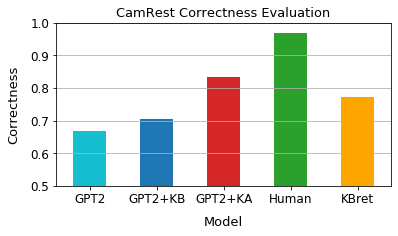

In [19]:
plt.rcParams["figure.figsize"] = (6,3)

df = pd.read_csv('CAMREST_eval_fix_KB_KE.csv')
df = df.merge(model_df, on='index', how='left')

# df['correctness'] = df['correct_entity'] / df['num_entity']
# df = df[df['num_entity'] > 0]
# df = df.groupby('model').agg({'num_entity':'sum', 'correct_entity':'sum', 'correctness':'mean'}).reset_index()
df = df.groupby('model').agg({'num_entity':'sum', 'correct_entity':'sum'}).reset_index()
df['correctness'] = df['correct_entity'] / df['num_entity']

df['model'] = df['model'].apply(lambda x: camrest_model_name_map[x])
df = df.loc[[0,3,1,4,2],:]

my_colors = tuple(['C9','C0','C3','C2','orange'])
ax = df.plot(kind='bar', x='model', y='correctness', stacked=True, color=my_colors, ylim=(0.5, 1.0), legend=False)

ax.set_title(f'CamRest Correctness Evaluation', fontsize=13)
ax.tick_params(axis='both', rotation=0, labelsize=12)

ax.yaxis.grid(True)
ax.set_xlabel('Model', fontsize=13, labelpad=10)
ax.set_ylabel('Correctness', fontsize=13, labelpad=10)

plt.savefig('correctness_CamRest.png', bbox_inches='tight')
plt.savefig('correctness_CamRest.pdf', bbox_inches='tight')

df['dataset'] = 'CamRest'
dfs.append(df)

In [20]:
df

,model,num_entity,correct_entity,correctness,dataset
0,GPT2,72,48,0.666667,CamRest
3,GPT2+KB,54,38,0.703704,CamRest
1,GPT2+KA,103,86,0.834951,CamRest
4,Human,66,64,0.969697,CamRest
2,KBret,75,58,0.773333,CamRest


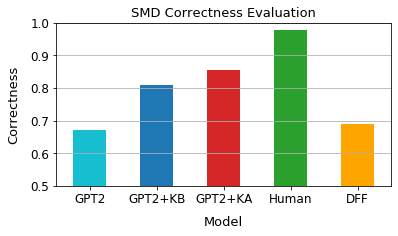

In [21]:
plt.rcParams["figure.figsize"] = (6,3)

df = pd.read_csv('SMD_eval.csv')
df = df.merge(model_df, on='index', how='left')
df = pd.concat([df, additional_smd_df])

# df['correctness'] = df['correct_entity'] / df['num_entity']
# df = df[df['num_entity'] > 0]
# df = df.groupby('model').agg({'num_entity':'sum', 'correct_entity':'sum', 'correctness':'mean'}).reset_index()
df = df.groupby('model').agg({'num_entity':'sum', 'correct_entity':'sum'}).reset_index()
df['correctness'] = df['correct_entity'] / df['num_entity']

df['model'] = df['model'].apply(lambda x: smd_model_name_map[x])
df = df.loc[[0,3,1,4,2],:]

my_colors = tuple(['C9','C0','C3','C2','orange'])
ax = df.plot(kind='bar', x='model', y='correctness', stacked=True, color=my_colors, ylim=(0.5, 1.0), legend=False)

ax.set_title(f'SMD Correctness Evaluation', fontsize=13)
ax.tick_params(axis='both', rotation=0, labelsize=12)

ax.yaxis.grid(True)
ax.set_xlabel('Model', fontsize=13, labelpad=10)
ax.set_ylabel('Correctness', fontsize=13, labelpad=10)

plt.savefig('correctness_SMD.png', bbox_inches='tight')
plt.savefig('correctness_SMD.pdf', bbox_inches='tight')

df['dataset'] = 'SMD'
dfs.append(df)

In [22]:
df

,model,num_entity,correct_entity,correctness,dataset
0,GPT2,173.0,116.0,0.670520,SMD
3,GPT2+KB,174.0,141.0,0.810345,SMD
1,GPT2+KA,180.0,154.0,0.855556,SMD
4,Human,192.0,188.0,0.979167,SMD
2,DFF,164.0,113.0,0.689024,SMD


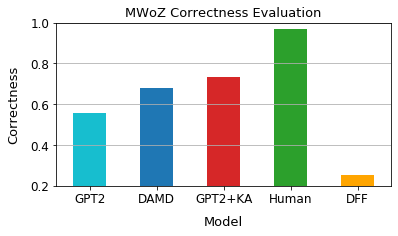

In [23]:
plt.rcParams["figure.figsize"] = (6,3)

df = pd.read_csv('MWOZ_eval.csv')
df = df.merge(model_df, on='index', how='left')
df = pd.concat([df, additional_mwoz_df])

# df['correctness'] = df['correct_entity'] / df['num_entity']
# df = df[df['num_entity'] > 0]
# df = df.groupby('model').agg({'num_entity':'sum', 'correct_entity':'sum', 'correctness':'mean'}).reset_index()
df = df.groupby('model').agg({'num_entity':'sum', 'correct_entity':'sum'}).reset_index()
df['correctness'] = df['correct_entity'] / df['num_entity']

df['model'] = df['model'].apply(lambda x: mwoz_model_name_map[x])
df = df.loc[[0,2,1,4,3],:]

my_colors = tuple(['C9','C0','C3','C2','orange'])
ax = df.plot(kind='bar', x='model', y='correctness', stacked=True, color=my_colors, ylim=(0.2, 1.0), legend=False)

ax.set_title(f'MWoZ Correctness Evaluation', fontsize=13)
ax.tick_params(axis='both', rotation=0, labelsize=12)

ax.yaxis.grid(True)
ax.set_xlabel('Model', fontsize=13, labelpad=10)
ax.set_ylabel('Correctness', fontsize=13, labelpad=10)

plt.savefig('correctness_MWoZ.png', bbox_inches='tight')
plt.savefig('correctness_MWoZ.pdf', bbox_inches='tight')

df['dataset'] = 'MWoZ'
dfs.append(df)

In [24]:
df

,model,num_entity,correct_entity,correctness,dataset
0,GPT2,127.0,71.0,0.559055,MWoZ
2,DAMD,128.0,87.0,0.679688,MWoZ
1,GPT2+KA,139.0,102.0,0.733813,MWoZ
4,Human,127.0,123.0,0.968504,MWoZ
3,DFF,141.0,36.0,0.255319,MWoZ


In [25]:
df = pd.concat(dfs)

In [26]:
df['model'] = df['model'].apply(lambda x: '\n +'.join(x.split('+')))

In [27]:
df = df.pivot(index='model', columns='dataset', values='correctness')

In [28]:
df = df[['CamRest','SMD','MWoZ']]

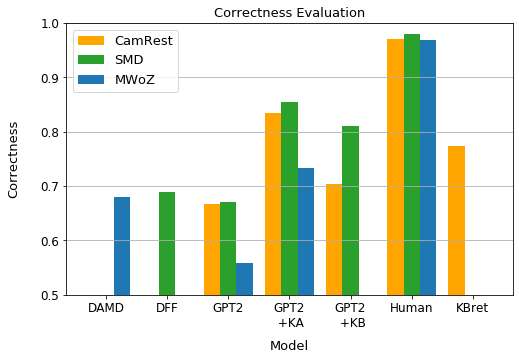

In [29]:
plt.rcParams["figure.figsize"] = (8,5)
my_colors = tuple(['orange','C2','C0'])
ax = df.plot(kind='bar', stacked=False, color=my_colors, ylim=(0.5, 1.0), width=0.8)
ax.legend(fontsize=13)

ax.tick_params(axis='both', rotation=0, labelsize=12)
ax.set_title(f'Correctness Evaluation', fontsize=13)

ax.yaxis.grid(True)
ax.set_xlabel('Model', fontsize=13, labelpad=10)
ax.set_ylabel('Correctness', fontsize=13, labelpad=20)

plt.savefig('correctness.png', bbox_inches='tight')
plt.savefig('correctness.pdf', bbox_inches='tight')

dfs.append(df)

In [30]:
dfs = []
df = pd.read_csv('MWOZ_eval.csv').dropna()
df = df.merge(model_df, on='index', how='left')
df = pd.concat([df, additional_mwoz_df])
df['dataset'] = 'MWOZ'
df['correctness'] = df['correct_entity'] / df['num_entity']
print('MWOZ', df.shape)
df = df[df['num_entity'] > 0]
dfs.append(df)

df = pd.read_csv('CAMREST_eval_fix_KB_KE.csv').dropna()
df = df.merge(model_df, on='index', how='left')
df['dataset'] = 'CAMREST'
print('CAMREST', df.shape)
df['correctness'] = df['correct_entity'] / df['num_entity']
df = df[df['num_entity'] > 0]
dfs.append(df)

df = pd.read_csv('SMD_eval.csv').dropna()
df = df.merge(model_df, on='index', how='left')
df = pd.concat([df, additional_smd_df])
df['dataset'] = 'SMD'
print('SMD', df.shape)
df['correctness'] = df['correct_entity'] / df['num_entity']
df = df[df['num_entity'] > 0]
dfs.append(df)

MWOZ (342, 11)
CAMREST (149, 9)
SMD (300, 10)


In [31]:
additional_mwoz_df.shape, additional_smd_df.shape

((192, 10), (150, 10))

In [32]:
dfs[0].shape, dfs[1].shape, dfs[2].shape

((339, 11), (147, 10), (255, 11))

MWOZ, 342, 339
CAMREST, 149, 147
SMD, 300, 255

In [33]:
gdf = pd.concat(dfs)
data_list = []
datasets = gdf['dataset'].unique().tolist()
for dataset in datasets:
    ddf = gdf.loc[gdf['dataset'] == dataset, :]
    models = ddf['model'].unique().tolist()
    for i in range(len(models)):
        for j in range(i+1, len(models)):
            model_i = models[i]
            model_j = models[j]
            score_i = ddf.loc[ddf['model'] == model_i, 'correctness'].values
            score_j = ddf.loc[ddf['model'] == model_j, 'correctness'].values
            score_i = np.repeat(score_i,3)
            score_j = np.repeat(score_j,3)
            t, p = stats.ttest_ind(score_i,score_j)
            data_list.append({
                'dataset':dataset, 'model_1':model_i, 'model_2':model_j, 
                'score_1':score_i.mean(),'score_2':score_j.mean(), 'p':p, 'significance': p <= 0.05
            })
sdf = pd.DataFrame(data_list)
sdf

,dataset,model_1,model_2,score_1,score_2,p,significance
0,MWOZ,MWOZ_KA_100,MWOZ_KA_DAMD,0.735323,0.671429,1.150806e-01,False
1,MWOZ,MWOZ_KA_100,MWOZ_KA_DFF,0.735323,0.227696,5.443106e-36,True
2,MWOZ,MWOZ_KA_100,human,0.735323,0.940299,1.613179e-10,True
3,MWOZ,MWOZ_KA_100,MWOZ_KA_0,0.735323,0.564677,5.188091e-05,True
4,MWOZ,MWOZ_KA_DAMD,MWOZ_KA_DFF,0.671429,0.227696,2.366266e-25,True
5,MWOZ,MWOZ_KA_DAMD,human,0.671429,0.940299,1.661864e-13,True
6,MWOZ,MWOZ_KA_DAMD,MWOZ_KA_0,0.671429,0.564677,1.671031e-02,True
7,MWOZ,MWOZ_KA_DFF,human,0.227696,0.940299,1.007603e-76,True
8,MWOZ,MWOZ_KA_DFF,MWOZ_KA_0,0.227696,0.564677,3.206462e-15,True
9,MWOZ,human,MWOZ_KA_0,0.940299,0.564677,2.833641e-22,True


In [34]:
sdf[((sdf['model_1'] == 'human') | (sdf['model_2'] == 'human'))]

,dataset,model_1,model_2,score_1,score_2,p,significance
2,MWOZ,MWOZ_KA_100,human,0.735323,0.940299,1.613179e-10,True
5,MWOZ,MWOZ_KA_DAMD,human,0.671429,0.940299,1.661864e-13,True
7,MWOZ,MWOZ_KA_DFF,human,0.227696,0.940299,1.007603e-76,True
9,MWOZ,human,MWOZ_KA_0,0.940299,0.564677,2.833641e-22,True
12,CAMREST,CAMREST_KA_0,human,0.677778,0.979167,2.544940e-12,True
15,CAMREST,CAMREST_KA_50,human,0.807222,0.979167,9.058808e-07,True
17,CAMREST,CAMREST_KA_KBret,human,0.655556,0.979167,4.972362e-11,True
19,CAMREST,human,CAMREST_KB,0.979167,0.614943,6.133755e-12,True
22,SMD,SMD_KB,human,0.804500,0.971698,1.905243e-10,True
25,SMD,SMD_KA_0,human,0.666095,0.971698,4.463600e-21,True


In [35]:
sdf[(sdf['model_1'].str.contains('KA_100')) | (sdf['model_2'].str.contains('KA_100'))]

,dataset,model_1,model_2,score_1,score_2,p,significance
0,MWOZ,MWOZ_KA_100,MWOZ_KA_DAMD,0.735323,0.671429,1.150806e-01,False
1,MWOZ,MWOZ_KA_100,MWOZ_KA_DFF,0.735323,0.227696,5.443106e-36,True
2,MWOZ,MWOZ_KA_100,human,0.735323,0.940299,1.613179e-10,True
3,MWOZ,MWOZ_KA_100,MWOZ_KA_0,0.735323,0.564677,5.188091e-05,True
23,SMD,SMD_KB,SMD_KA_100,0.804500,0.869139,3.811928e-02,True
26,SMD,SMD_KA_0,SMD_KA_100,0.666095,0.869139,1.771944e-08,True
28,SMD,SMD_KA_DFF,SMD_KA_100,0.734333,0.869139,8.452220e-06,True
29,SMD,human,SMD_KA_100,0.971698,0.869139,9.786284e-07,True


In [36]:
sdf[(sdf['model_1'].str.contains('KA_50')) | (sdf['model_2'].str.contains('KA_50'))]

,dataset,model_1,model_2,score_1,score_2,p,significance
10,CAMREST,CAMREST_KA_0,CAMREST_KA_50,0.677778,0.807222,9.404519e-03,True
14,CAMREST,CAMREST_KA_50,CAMREST_KA_KBret,0.807222,0.655556,5.601580e-03,True
15,CAMREST,CAMREST_KA_50,human,0.807222,0.979167,9.058808e-07,True
16,CAMREST,CAMREST_KA_50,CAMREST_KB,0.807222,0.614943,8.911403e-04,True
